In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

# A05.1

### 1. Sex Escorts

#### (1) compute the degree distribution

In [2]:
g_escort = nx.read_gml('graph_escort.gml')
nodes_number_escort = g_escort.number_of_nodes()
g_escort_nodes = g_escort.nodes()
# change the type of nodes into list
nodes = [ g_escort.nodes[i] for i in g_escort.nodes() ]
g_escort_degrees = g_escort.degree()
#change the type of degrees into list
g_escort_degree=[g_escort_degrees[i] for i in g_escort.nodes()]
#get the max degree
g_escort_max=max(g_escort_degree)
#get the min degree
g_escort_min=min(g_escort_degree)
k = np.asarray([d for d in dict(g_escort.degree()).values()])

In [3]:
p_list = [] #p(ki)
k_list = [] #ki
for i in range(g_escort_min,g_escort_max+1):
    k_list.append(i)
    p = g_escort_degree.count(i) / nodes_number_escort
    p_list.append(p)
    print(i,p)

1 0.4491930663478781
2 0.1671249252839211
3 0.09073520621637776
4 0.05971309025702331
5 0.03992827256425583
6 0.028750747160789
7 0.02474596533173939
8 0.0187089061566049
9 0.012851165570830842
10 0.012014345487148834
11 0.009683203825463239
12 0.007650926479378362
13 0.007949790794979079
14 0.007112970711297071
15 0.004961147638971907
16 0.004602510460251046
17 0.005080693365212194
18 0.004602510460251046
19 0.003825463239689181
20 0.0020920502092050207
21 0.0022713687985654514
22 0.00328750747160789
23 0.0017931858936043037
24 0.0022713687985654514
25 0.0021518230723251643
26 0.001434548714883443
27 0.0017334130304841602
28 0.0014943215780035865
29 0.0013747758517632994
30 0.0011356843992827257
31 0.001315002988643156
32 0.0010759115361625821
33 0.0010759115361625821
34 0.0008965929468021519
35 0.0007172743574417215
36 0.0008965929468021519
37 0.0005379557680812911
38 0.0007172743574417215
39 0.0005977286312014345
40 0.00029886431560071725
41 0.00041841004184100416
42 0.0004184100418

#### (2) calculate average degree <k>

In [4]:
#calculate average degree <k>
def average_degree(g):
    N=g.number_of_nodes()
    g_degree=g.degree()
    g_degrees=[g_degree[i] for i in g.nodes()]
    g_sum_degree=0
    for i in range (N):
        g_sum_degree+=g_degrees[i]
    ave=g_sum_degree/N
    den=2*g_sum_degree/(N*(N-1))
    return ave
lamada = average_degree(g_escort)
print('The average degree <k>:')
print(lamada)

The average degree <k>:
4.667543335325762


#### (3) Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘^−𝛾

In [5]:
# powerlaw
import powerlaw
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


In [6]:
#the power-law exponent
alpha = fit.power_law.alpha
print('The power-law exponent:')
alpha

The power-law exponent:


2.9544249080995764

#### (4) compute the corresponding error

In [7]:
sigma = fit.power_law.sigma
print('The corresponding error:')
sigma

The corresponding error:


0.07919729392592209

#### (5) Superimpose in the same plot of the power-law fit (a) the Poisson and (b) the exponential distribution with mean value equal to ⟨𝑘⟩

In [8]:
# define powerlaw distribution function
def power_law(g):
    p_pow_list = []
    for i in range(len(k_list)):
        p_pow = k_list[i]**( - alpha)
        p_pow_list.append(p_pow)
    return p_pow_list

In [9]:
p_powerlaw = power_law(g_escort)

In [10]:
#define poisson distribution function
def poisson(g):
    p_poi_list=[]
    for i in range(len(k_list)):
        k_= factorial(k_list[i])
        p_poi = np.power(lamada ,(k_list[i]))* np.exp(-lamada) / k_
        p_poi_list.append(p_poi)
    return p_poi_list

In [11]:
p_poisson = poisson(g_escort)

In [12]:
#define exponential distribution function
def exponential(g):
    p_exp_list=[]
    for i in range(len(k_list)):
        p_exp = lamada ** ( - 1) * np.exp( - k_list[i] / lamada)
        p_exp_list.append(p_exp)
    return p_exp_list

In [13]:
p_exponential = exponential(g_escort)

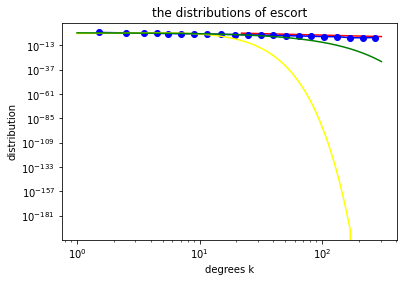

In [14]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.title('the distributions of escort')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

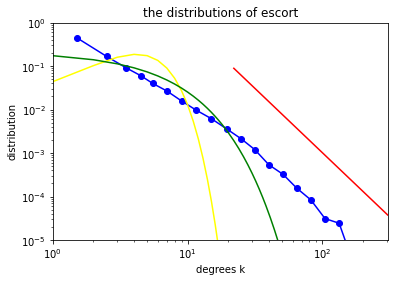

In [15]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin = g_escort_min,xmax = g_escort_max)
plt.ylim(ymin=10**(-5),ymax = 1)
plt.title('the distributions of escort')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

#### Which distribution is more likely to describe the data?

We first output the distribution without restricting the range of the y-axis and then find that the distribution weakens the distribution of the data itself(P(k)).<br>
So we intercepted a part of the interval [10^(-5),1] for the y-axis.
The exponential decribes the escort data best. 

### 2. Internet

#### (1) compute the degree distribution

In [16]:
g_internet = nx.read_gml('graph_internet.gml')
nodes_number_internet = g_internet.number_of_nodes()
g_internet_nodes = g_internet.nodes()
# change the type of nodes into list
nodes = [ g_internet.nodes[i] for i in g_internet.nodes() ]
g_internet_degrees = g_internet.degree()
#change the type of degrees into list
g_internet_degree=[g_internet_degrees[i] for i in g_internet.nodes()]
#get the max degree
g_internet_max=max(g_internet_degree)
#get the min degree
g_internet_min=min(g_internet_degree)
k = np.asarray([d for d in dict(g_internet.degree()).values()])

In [17]:
p_list = [] #p(ki)
k_list = [] #ki
for i in range(g_internet_min,g_internet_max+1):
    k_list.append(i)
    p = g_internet_degree.count(i) / nodes_number_internet
    p_list.append(p)
    print(i,p)

1 0.3136848767296683
2 0.40306665515951784
3 0.10180949915134778
4 0.042547682747907135
5 0.02422254825810535
6 0.015333275797589252
7 0.012082506257012168
8 0.009205719052961652
9 0.0075659503466528584
10 0.005724806536060527
11 0.0053220563274934555
12 0.0036535197491441556
13 0.003912430597508702
14 0.0033083052846580936
15 0.0030781623083340525
16 0.001927447426713846
17 0.001984983170794856
18 0.0018123759385518254
19 0.0017260723224303098
20 0.0017260723224303098
21 0.0014383936020252583
22 0.0007767325450936394
23 0.001409625729984753
24 0.001064411265498691
25 0.0011507148816202065
26 0.0007479646730531342
27 0.0010068755214176807
28 0.0008918040332556601
29 0.0006904289289721239
30 0.0006904289289721239
31 0.0007479646730531342
32 0.0005465895687695981
33 0.0005753574408101032
34 0.0007479646730531342
35 0.0009205719052961652
36 0.0006904289289721239
37 0.0005178216967290929
38 0.0006328931848911136
39 0.0006616610569316187
40 0.0007767325450936394
41 0.0006041253128506084
42 

#### (2) calculate average degree <k>

In [18]:
lamada = average_degree(g_internet)
print('The average degree <k>:')
print(lamada)

The average degree <k>:
6.197750352406432


#### (3) Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘^−𝛾

In [19]:
# powerlaw
import powerlaw
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


In [20]:
#the power-law exponent
alpha = fit.power_law.alpha
print('The power-law exponent:')
alpha

The power-law exponent:


2.112191339113011

#### (4) compute the corresponding error

In [21]:
#the corresponding error
sigma = fit.power_law.sigma
print('The corresponding error:')
sigma

The corresponding error:


0.0366878070312722

#### (5) Superimpose in the same plot of the power-law fit (a) the Poisson and (b) the exponential distribution with mean value equal to ⟨𝑘⟩

In [22]:
p_powerlaw = power_law(g_internet)

In [23]:
import decimal
decimal.getcontext().prec = 1000
p_poisson = poisson(g_internet)

<ipython-input-10-09a565291005>:6: RuntimeWarning: overflow encountered in power
  p_poi = np.power(lamada ,(k_list[i]))* np.exp(-lamada) / k_
<ipython-input-10-09a565291005>:6: RuntimeWarning: invalid value encountered in double_scalars
  p_poi = np.power(lamada ,(k_list[i]))* np.exp(-lamada) / k_


In [24]:
p_exponential = exponential(g_internet)

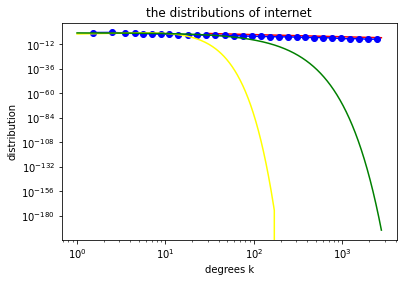

In [25]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.title('the distributions of internet')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

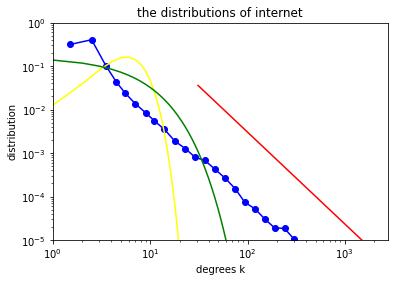

In [26]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin = g_internet_min,xmax = g_internet_max)
plt.ylim(ymin=10**(-5),ymax = 1)
plt.title('the distributions of internet')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

#### Which distribution is more likely to describe the data?

We first output the distribution without restricting the range of the y-axis and then find that the distribution weakens the distribution of the data itself(P(k)). So we intercepted a part of the interval [10^(-5),1] for the y-axis. The exponential decribes the internet data best.

### 3. Amazon

#### (1) compute the degree distribution

In [27]:
#amazon
g_amazon = nx.read_gml('graph_amazon.gml')
nodes_number_amazon = g_amazon.number_of_nodes()
g_amazon_nodes = g_amazon.nodes()
# change the type of nodes into list
nodes = [ g_amazon.nodes[i] for i in g_amazon.nodes() ]
g_amazon_degrees = g_amazon.degree()
#change the type of degrees into list
g_amazon_degree=[g_amazon_degrees[i] for i in g_amazon.nodes()]
#get the max degree
g_amazon_max=max(g_amazon_degree)
#get the min degree
g_amazon_min=min(g_amazon_degree)
k = np.asarray([d for d in dict(g_amazon.degree()).values()])

In [28]:
p_list = [] #p(ki)
k_list = [] #ki
for i in range(g_amazon_min,g_amazon_max+1):
    k_list.append(i)
    p = g_amazon_degree.count(i) / nodes_number_amazon
    p_list.append(p)
    print(i,p)

1 0.07677468098894175
2 0.11146648032180324
3 0.15242651472393187
4 0.18536535837043805
5 0.17852375449064245
6 0.07323293406557309
7 0.05016678462535425
8 0.03622675541938046
9 0.026282390111777056
10 0.02049494868050516
11 0.015394355303512183
12 0.012145265377184102
13 0.009741297187207903
14 0.007597136739502424
15 0.0060591943570952895
16 0.005055798938670441
17 0.0043838823638323735
18 0.0034402128631709087
19 0.0028937207156359466
20 0.002418899669417045
21 0.0021710371106990023
22 0.0018574760424412372
23 0.001636490146716717
24 0.0014155042509921968
25 0.0012512579771428913
26 0.0010810391115172473
27 0.0009436695006614645
28 0.0007973410021411742
29 0.0007465739720422979
30 0.000668930278949899
31 0.0005554510351994696
32 0.0005255880763177777
33 0.0004389854955608712
34 0.0004240540161200252
35 0.00037328698602114897
36 0.00035835550658030297
37 0.0002896707011524116
38 0.00029265699704058076
39 0.0002836981093760732
40 0.00023591737516536612
41 0.0002120270080600126
42 0.00

#### (2) calculate average degree <k>

In [29]:
lamada = average_degree(g_amazon)
print('The average degree <k>:')
print(lamada)

The average degree <k>:
5.529855493141971


#### (3) Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘^−𝛾

In [30]:
# powerlaw
import powerlaw
fit = powerlaw.Fit(k)

Calculating best minimal value for power law fit


In [31]:
#the power-law exponent
alpha = fit.power_law.alpha
print('The power-law exponent:')
alpha

The power-law exponent:


4.065660034466614

#### (4) compute the corresponding error

In [32]:
#the corresponding error
sigma = fit.power_law.sigma
print('The corresponding error:')
sigma

The corresponding error:


0.09699319113242895

#### (5) Superimpose in the same plot of the power-law fit (a) the Poisson and (b) the exponential distribution with mean value equal to ⟨𝑘⟩

In [33]:
p_powerlaw = power_law(g_amazon)

In [34]:
import decimal
decimal.getcontext().prec = 1000
p_poisson = poisson(g_amazon)

<ipython-input-10-09a565291005>:6: RuntimeWarning: overflow encountered in power
  p_poi = np.power(lamada ,(k_list[i]))* np.exp(-lamada) / k_
<ipython-input-10-09a565291005>:6: RuntimeWarning: invalid value encountered in double_scalars
  p_poi = np.power(lamada ,(k_list[i]))* np.exp(-lamada) / k_


In [35]:
p_exponential = exponential(g_amazon)

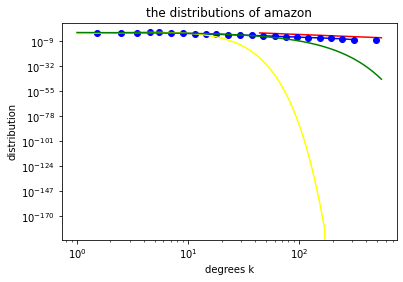

In [36]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.title('the distributions of amazon')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

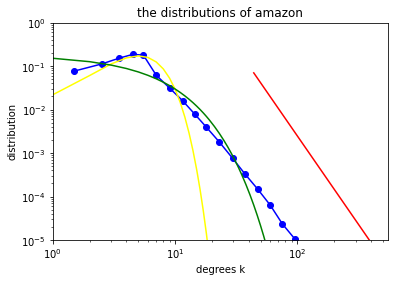

In [37]:
fit.power_law.plot_pdf(color='r')
powerlaw.plot_pdf(k,color='b',marker='o')
plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
plt.xscale('log')
plt.yscale('log')
plt.xlim(xmin = g_amazon_min,xmax = g_amazon_max)
plt.ylim(ymin=10**(-5),ymax = 1)
plt.title('the distributions of amazon')
plt.xlabel('degrees k')
plt.ylabel('distribution')
plt.show()

#### Which distribution is more likely to describe the data?

We first output the distribution without restricting the range of the y-axis and then find that the distribution weakens the distribution of the data itself(P(k)). So we intercepted a part of the interval [10^(-5),1] for the y-axis. The poisson decribes the amazon data best when k belongs to[1,100],The exponential decribes the amazon data best when k is more than 100.

### 4. Actor-actor collaborations

Too much data to run out

#### (1) compute the degree distribution

In [38]:
#g_actors = nx.read_gml('graph_actors.gml')
#nodes_number_actors = g_actors.number_of_nodes()
#g_actors_nodes = g_actors.nodes()
# change the type of nodes into list
#nodes = [ g_actors.nodes[i] for i in g_actors.nodes() ]
#g_actors_degrees = g_actors.degree()
#change the type of degrees into list
#g_actors_degree=[g_actors_degrees[i] for i in g_actors.nodes()]
#get the max degree
#g_actors_max=max(g_actors_degree)
#get the min degree
#g_actors_min=min(g_actors_degree)
#k = np.asarray([d for d in dict(g_actors.degree()).values()])

In [39]:
#p_list = [] #p(ki)
#k_list = [] #ki
#for i in range(g_actors_min,g_actors_max+1):
#    k_list.append(i)
#    p = g_actors_degree.count(i) / nodes_number_actors
#    p_list.append(p)
#    print(i,p)

#### (2) calculate average degree <k>

In [40]:
#lamada = average_degree(g_actors)
#print('The average degree <k>:')
#print(lamada)

#### (3) Compute the power-law exponent 𝛾 of the degree distribution 𝑃(𝑘) ∼ 𝑘^−𝛾

In [41]:
# powerlaw
#import powerlaw
#fit = powerlaw.Fit(k)

In [42]:
#the power-law exponent
#alpha = fit.power_law.alpha
#print('The power-law exponent:')
#alpha

#### (4) compute the corresponding error

In [43]:
#the corresponding error
#sigma = fit.power_law.sigma
#print('The corresponding error:')
#sigma

In [44]:
#the corresponding error
#sigma = fit.power_law.sigma
#print('The corresponding error:')
#sigma

#### (5) Superimpose in the same plot of the power-law fit (a) the Poisson and (b) the exponential distribution with mean value equal to ⟨𝑘⟩

In [45]:
#p_powerlaw = power_law(g_actors)

In [46]:
#import decimal
#decimal.getcontext().prec = 1000
#p_poisson = poisson(g_actors)

In [47]:
#p_exponential = exponential(g_actors)

In [48]:
#fit.power_law.plot_pdf(color='r')
#powerlaw.plot_pdf(k,color='b',marker='o')
#plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
#plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
#plt.xscale('log')
#plt.yscale('log')
#plt.xlabel('degrees k')
#plt.ylabel('distribution')
#plt.show()

In [49]:
#fit.power_law.plot_pdf(color='r')
#powerlaw.plot_pdf(k,color='b',marker='o')
#plt.plot(k_list,p_poisson,color = 'yellow',label = 'Poisson' )
#plt.plot(k_list,p_exponential,color = 'green',label = 'exponential' )
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(xmin = g_escort_min,xmax = g_escort_max)
#plt.ylim(ymin=10**(-5),ymax = 1)
#plt.title('the distributions of escort')
#plt.xlabel('degrees k')
#plt.ylabel('distribution')
#plt.show()

## 1.3 What does it mean in practice for the Internet?

In the internet network, we can easily find that P(k<4)=0.8, while the P(k = 2760) > 0, which shows the cumulative advantage, that the more connections the node has, the higher degrees the node will become later.

# A05.2

In [50]:
# build the networks with Barabási-Albert model
N=[50,100,500,1000,5000]
g1 = nx.barabasi_albert_graph(N[0],3)
g2 = nx.barabasi_albert_graph(N[1],3)
g3 = nx.barabasi_albert_graph(N[2],3)
g4 = nx.barabasi_albert_graph(N[3],3)
g5 = nx.barabasi_albert_graph(N[4],3)

In [51]:
# build the randomised network
g1_rand=nx.algorithms.smallworld.random_reference(g1,niter = g1.number_of_nodes(), connectivity=False)
g2_rand=nx.algorithms.smallworld.random_reference(g2,niter = g2.number_of_nodes(), connectivity=False)
g3_rand=nx.algorithms.smallworld.random_reference(g3,niter = g3.number_of_nodes(), connectivity=False)
g4_rand=nx.algorithms.smallworld.random_reference(g4,niter = g4.number_of_nodes(), connectivity=False)
g5_rand=nx.algorithms.smallworld.random_reference(g5,niter = g5.number_of_nodes(), connectivity=False)

#### Compute the average clustering coefficient, assortativity, average shortest path length and diameter

In [52]:
# compute the average clustering coefficient
g1_clu = nx.average_clustering(g1)
print('the average clustering coefficient of g1 is %f' %g1_clu)
g1_rand_clu = nx.average_clustering(g1_rand)
print('the average clustering coefficient of g1_rand is %f' %g1_rand_clu)
g2_clu = nx.average_clustering(g2)
print('the average clustering coefficient of g2 is %f' %g2_clu)
g2_rand_clu = nx.average_clustering(g2_rand)
print('the average clustering coefficient of g2_rand is %f' %g2_rand_clu)
g3_clu = nx.average_clustering(g3)
print('the average clustering coefficient of g3 is %f' %g3_clu)
g3_rand_clu = nx.average_clustering(g3_rand)
print('the average clustering coefficient of g3_rand is %f' %g3_rand_clu)
g4_clu = nx.average_clustering(g4)
print('the average clustering coefficient of g4 is %f' %g4_clu)
g4_rand_clu = nx.average_clustering(g4_rand)
print('the average clustering coefficient of g4_rand is %f' %g4_rand_clu)
g5_clu = nx.average_clustering(g5)
print('the average clustering coefficient of g5 is %f' %g5_clu)
g5_rand_clu = nx.average_clustering(g5_rand)
print('the average clustering coefficient of g5_rand is %f' %g5_rand_clu)

the average clustering coefficient of g1 is 0.183758
the average clustering coefficient of g1_rand is 0.161554
the average clustering coefficient of g2 is 0.177906
the average clustering coefficient of g2_rand is 0.138182
the average clustering coefficient of g3 is 0.053683
the average clustering coefficient of g3_rand is 0.041204
the average clustering coefficient of g4 is 0.032883
the average clustering coefficient of g4_rand is 0.029674
the average clustering coefficient of g5 is 0.009803
the average clustering coefficient of g5_rand is 0.007331


In [53]:
# compute the assortativity coefficient
g1_assor = nx.degree_assortativity_coefficient(g1)
print('the assortativity coefficient of g1 is %f' %g1_assor)
g1_rand_assor = nx.degree_assortativity_coefficient(g1_rand)
print('the assortativity coefficient of g1_rand is %f' %g1_rand_assor)
g2_assor = nx.degree_assortativity_coefficient(g2)
print('the assortativity coefficient of g2 is %f' %g2_assor)
g2_rand_assor = nx.degree_assortativity_coefficient(g2_rand)
print('the assortativity coefficient of g2_rand is %f' %g2_rand_assor)
g3_assor = nx.degree_assortativity_coefficient(g3)
print('the assortativity coefficient of g3 is %f' %g3_assor)
g3_rand_assor = nx.degree_assortativity_coefficient(g3_rand)
print('the assortativity coefficient of g3_rand is %f' %g3_rand_assor)
g4_assor = nx.degree_assortativity_coefficient(g4)
print('the assortativity coefficient of g4 is %f' %g4_assor)
g4_rand_assor = nx.degree_assortativity_coefficient(g4_rand)
print('the assortativity coefficient of g4_rand is %f' %g4_rand_assor)
g5_assor = nx.degree_assortativity_coefficient(g5)
print('the assortativity coefficient of g5 is %f' %g5_assor)
g5_rand_assor = nx.degree_assortativity_coefficient(g5_rand)
print('the assortativity coefficient of g5_rand is %f' %g5_rand_assor)

the assortativity coefficient of g1 is -0.173135
the assortativity coefficient of g1_rand is -0.090875
the assortativity coefficient of g2 is -0.176868
the assortativity coefficient of g2_rand is -0.107290
the assortativity coefficient of g3 is -0.098804
the assortativity coefficient of g3_rand is -0.081084
the assortativity coefficient of g4 is -0.085856
the assortativity coefficient of g4_rand is -0.046585
the assortativity coefficient of g5 is -0.044601
the assortativity coefficient of g5_rand is -0.019940


In [54]:
# compute the average shortest path length
g1_path = nx.average_shortest_path_length(g1)
print('the average shortest path length of g1 is %f' %g1_path)
g1_rand_path = nx.average_shortest_path_length(g1_rand)
print('the average shortest path length of g1_rand is %f' %g1_rand_path)
g2_path = nx.average_shortest_path_length(g2)
print('the average shortest path length of g2 is %f' %g2_path)
g2_rand_path = nx.average_shortest_path_length(g2_rand)
print('the average shortest path length of g2_rand is %f' %g2_rand_path)
g3_path = nx.average_shortest_path_length(g3)
print('the average shortest path length of g3 is %f' %g3_path)
g3_rand_path = nx.average_shortest_path_length(g3_rand)
print('the average shortest path length of g3_rand is %f' %g3_rand_path)
g4_path = nx.average_shortest_path_length(g4)
print('the average shortest path length of g4 is %f' %g4_path)
g4_rand_path = nx.average_shortest_path_length(g4_rand)
print('the average shortest path length of g4_rand is %f' %g4_rand_path)
g5_path = nx.average_shortest_path_length(g5)
print('the average shortest path length of g5 is %f' %g5_path)
g5_rand_path = nx.average_shortest_path_length(g5_rand)
print('the average shortest path length of g1_rand is %f' %g5_rand_path)

the average shortest path length of g1 is 2.320816
the average shortest path length of g1_rand is 2.368980
the average shortest path length of g2 is 2.566263
the average shortest path length of g2_rand is 2.656970
the average shortest path length of g3 is 3.230565
the average shortest path length of g3_rand is 3.283190
the average shortest path length of g4 is 3.485241
the average shortest path length of g4_rand is 3.552022
the average shortest path length of g5 is 4.071695
the average shortest path length of g1_rand is 4.133068


In [55]:
# compute the diameter
g1_diam = nx.diameter(g1)
print('the diameter of g1 is %f' %g1_diam)
g1_rand_diam = nx.diameter(g1_rand)
print('the diameter of g1_rand is %f' %g1_rand_diam)
g2_diam = nx.diameter(g2)
print('the diameter of g2 is %f' %g2_diam)
g2_rand_diam = nx.diameter(g2_rand)
print('the diameter of g2_rand is %f' %g2_rand_diam)
g3_diam = nx.diameter(g3)
print('the diameter of g3 is %f' %g3_diam)
g3_rand_diam = nx.diameter(g3_rand)
print('the diameter of g3_rand is %f' %g3_rand_diam)
g4_diam = nx.diameter(g4)
print('the diameter of g4 is %f' %g4_diam)
g4_rand_diam = nx.diameter(g4_rand)
print('the diameter of g4_rand is %f' %g4_rand_diam)
g5_diam = nx.diameter(g5)
print('the diameter of g5 is %f' %g5_diam)
g5_rand_diam = nx.diameter(g5_rand)
print('the diameter of g5_rand is %f' %g5_rand_diam)

the diameter of g1 is 4.000000
the diameter of g1_rand is 4.000000
the diameter of g2 is 4.000000
the diameter of g2_rand is 5.000000
the diameter of g3 is 5.000000
the diameter of g3_rand is 6.000000
the diameter of g4 is 6.000000
the diameter of g4_rand is 6.000000
the diameter of g5 is 7.000000
the diameter of g5_rand is 7.000000


In [56]:
# build the function to plot
def plot(x,y1,y2,ylabel,title):
    plt.scatter(x,y1,c='r',label="before")
    plt.scatter(x,y2,c='b',label="after")
    plt.xscale('log')
    plt.xlabel("number of nodes")
    plt.ylabel(ylabel)
    plt.title(title) 
    plt.show()

#### Compare them by scatterplots with the same measures on randomised versions of the networks

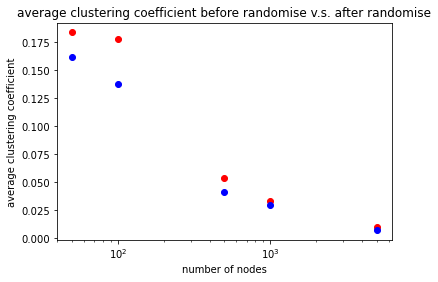

In [57]:
# average clustering coefficient
y1=[g1_clu,g2_clu,g3_clu,g4_clu,g5_clu]
y2=[g1_rand_clu,g2_rand_clu,g3_rand_clu,g4_rand_clu,g5_rand_clu]
ylabel="average clustering coefficient"
title="average clustering coefficient before randomise v.s. after randomise"
plot(N,y1,y2,ylabel,title)

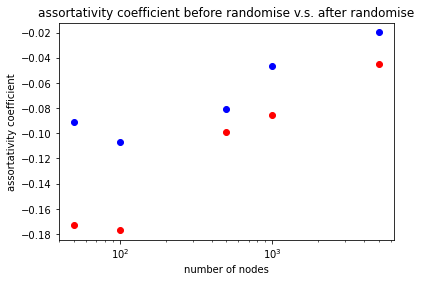

In [58]:
# assortativity coefficient
y1=[g1_assor,g2_assor,g3_assor,g4_assor,g5_assor]
y2=[g1_rand_assor,g2_rand_assor,g3_rand_assor,g4_rand_assor,g5_rand_assor]
ylabel="assortativity coefficient"
title="assortativity coefficient before randomise v.s. after randomise"
plot(N,y1,y2,ylabel,title)

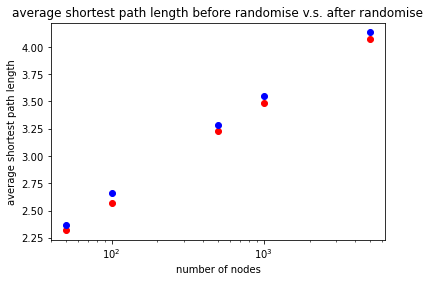

In [59]:
# average shortest path length
y1=[g1_path,g2_path,g3_path,g4_path,g5_path]
y2=[g1_rand_path,g2_rand_path,g3_rand_path,g4_rand_path,g5_rand_path]
ylabel="average shortest path length"
title="average shortest path length before randomise v.s. after randomise"
plot(N,y1,y2,ylabel,title)

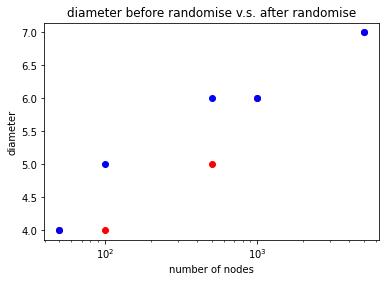

In [60]:
# diameter
y1=[g1_diam,g2_diam,g3_diam,g4_diam,g5_diam]
y2=[g1_rand_diam,g2_rand_diam,g3_rand_diam,g4_rand_diam,g5_rand_diam]
ylabel="diameter"
title="diameter before randomise v.s. after randomise"
plot(N,y1,y2,ylabel,title)

The average shortest path length is relatively unchaged by randomisation.<br>
Because: <br>(1)We use the small-world method to randomise the network, so the shortest path between nodes are relativily small. <br>
(2)The networks with Barabási-Albert model
prefer to attach the new nodes to nodes with large degree.So the shortest path between nodes are also small.<br>
(3)Therefore, the average shoretest path length is nearly the same before and after randomise.